## Predicting Automobile Prices with Support Vector Regression (SVR)

**About Dataset:** The dataset used in this project comprises various features related to automobiles, including attributes like symboling, make, fuel type, aspiration, door number, car body type, drivewheel type, engine location, wheelbase, car length, engine size, fuel system, bore ratio, stroke, compression ratio, horsepower, peak RPM, city miles per gallon (citympg), highway miles per gallon (highwaympg), and price (target variable).

**Objective:** The primary objective of this project is to utilize Support Vector Regression (SVR) to develop a robust predictive model for estimating automobile prices. Through this analysis, the project seeks to provide valuable insights into the factors influencing automobile prices and contribute to the advancement of pricing strategies in the automotive industry.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\admin\Downloads\Automobile\AutoData.csv")
data

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
data.isna().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
data.duplicated().sum()

0

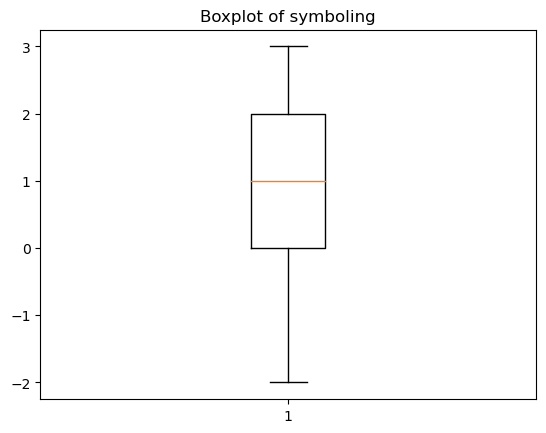

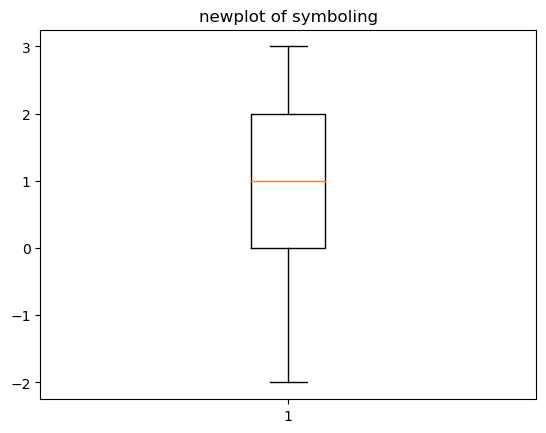

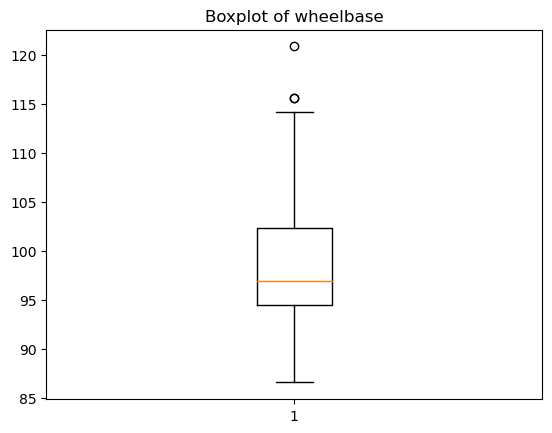

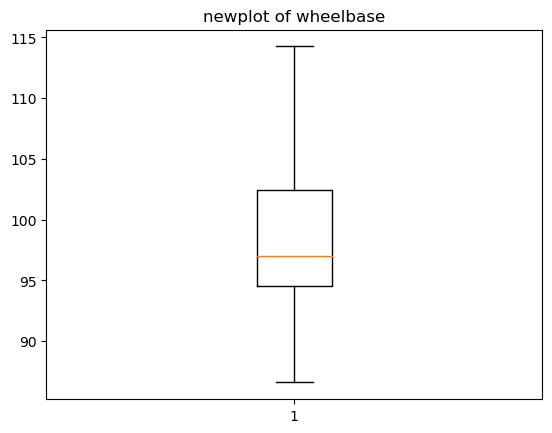

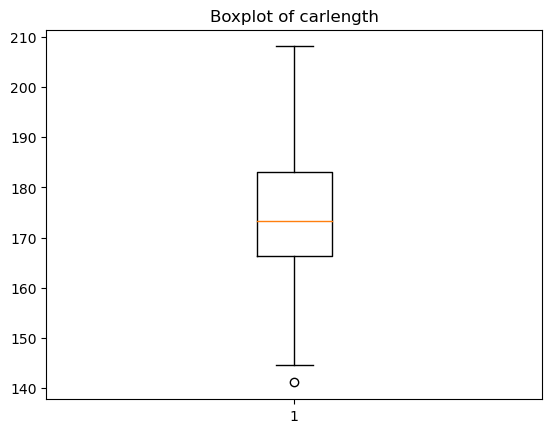

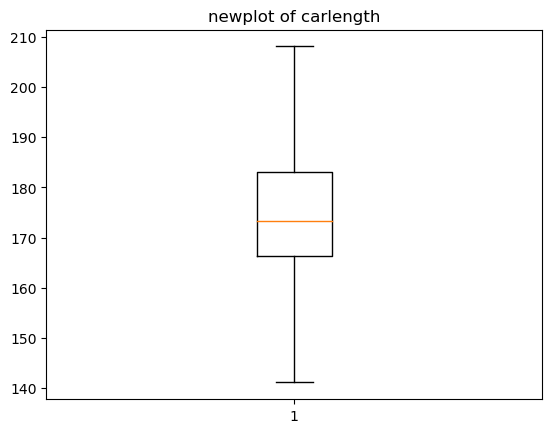

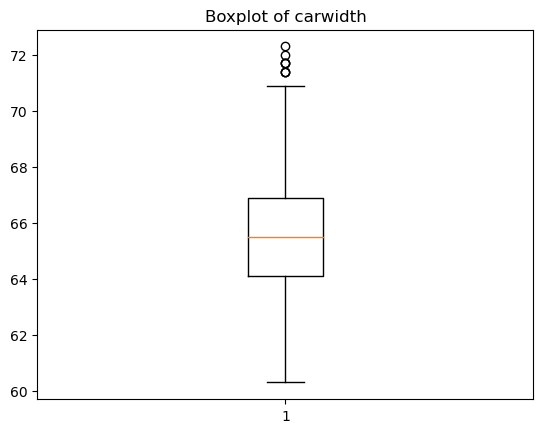

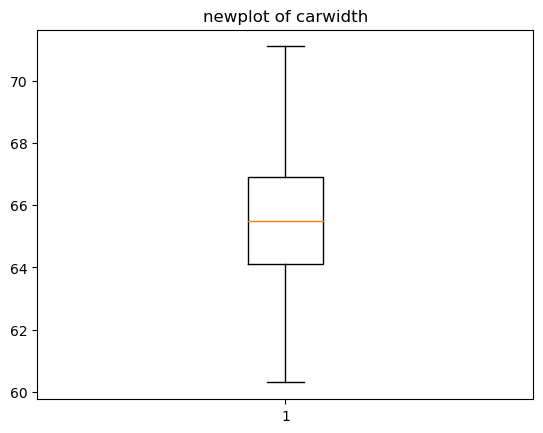

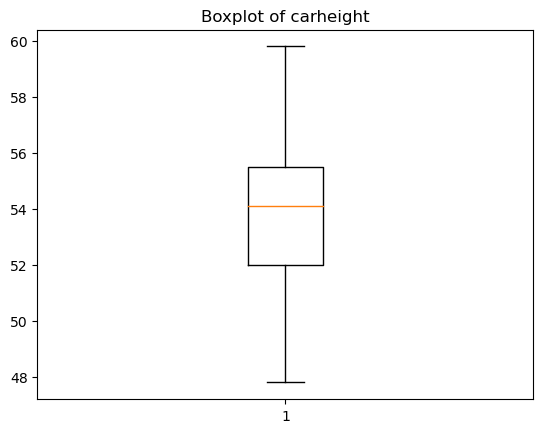

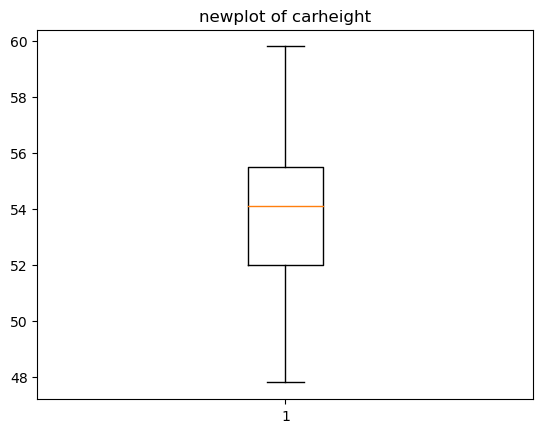

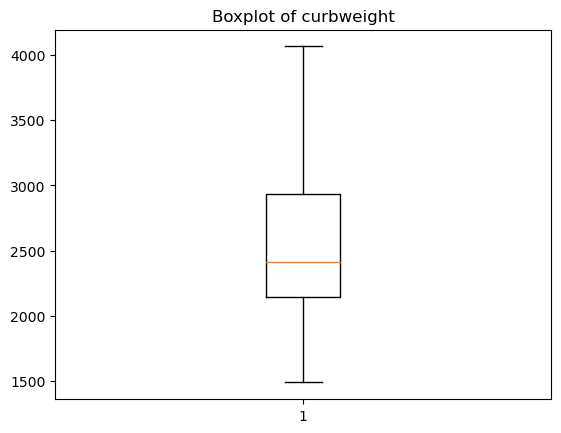

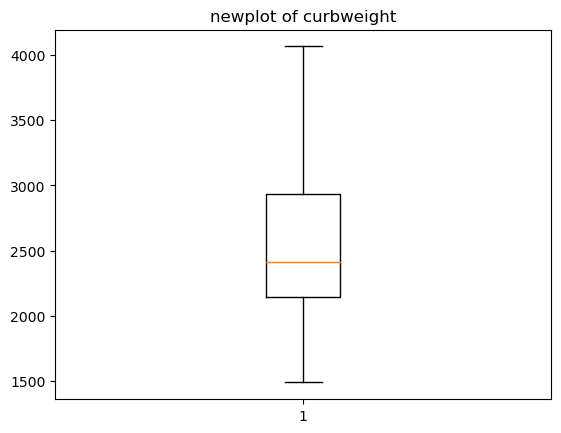

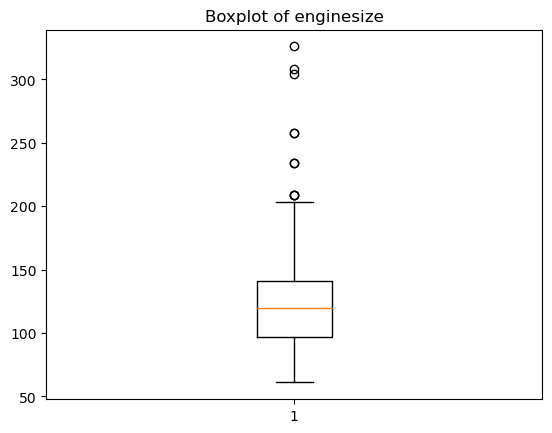

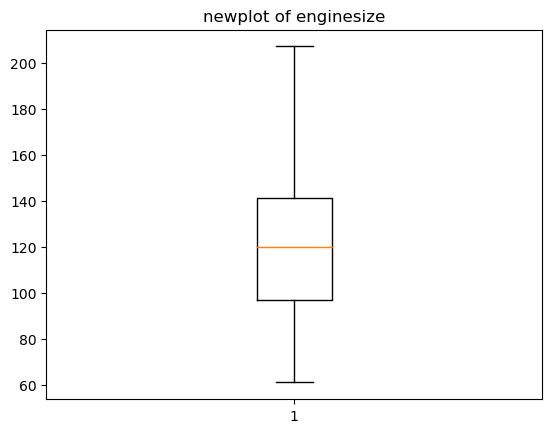

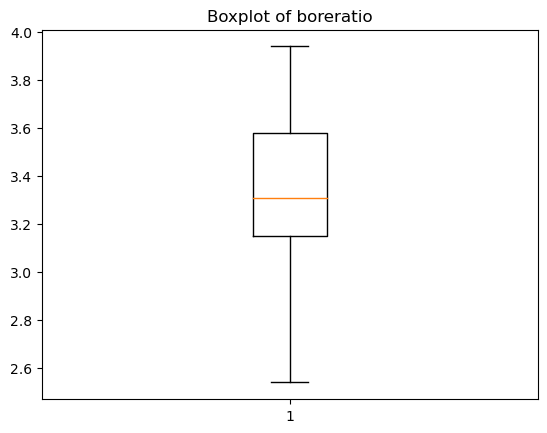

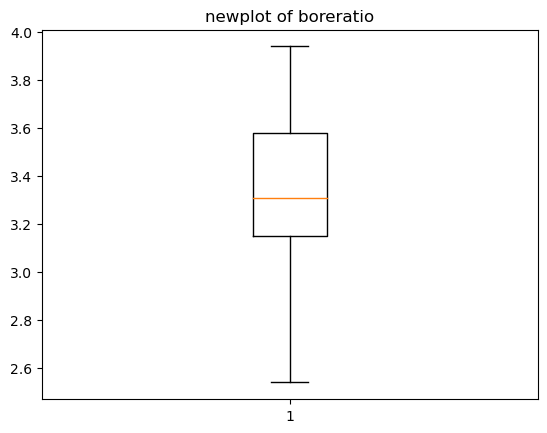

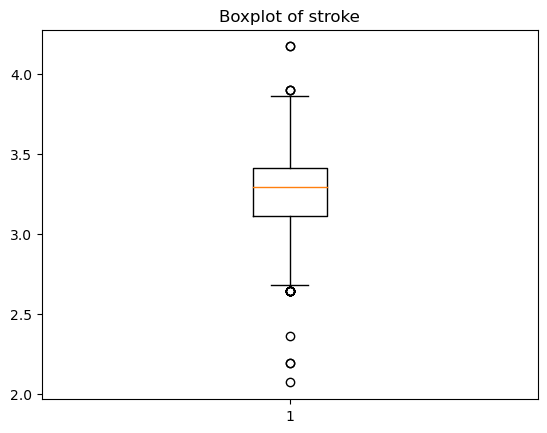

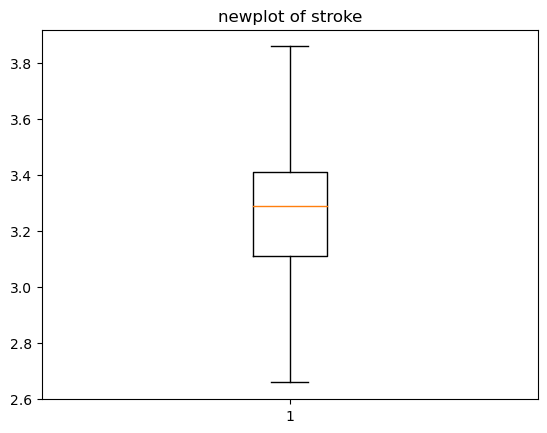

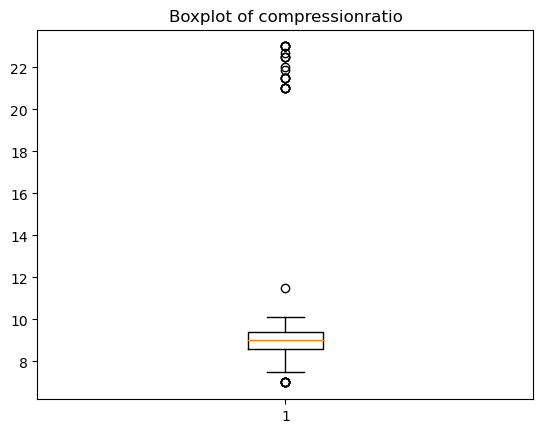

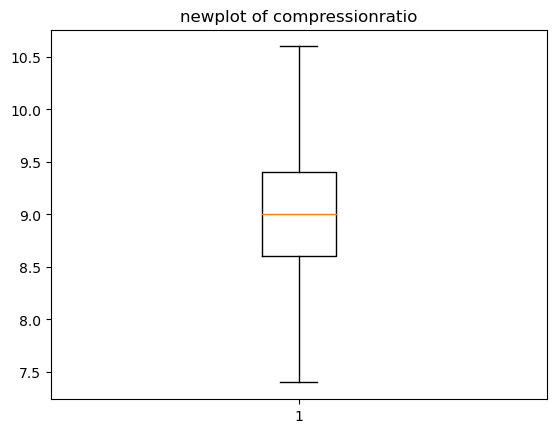

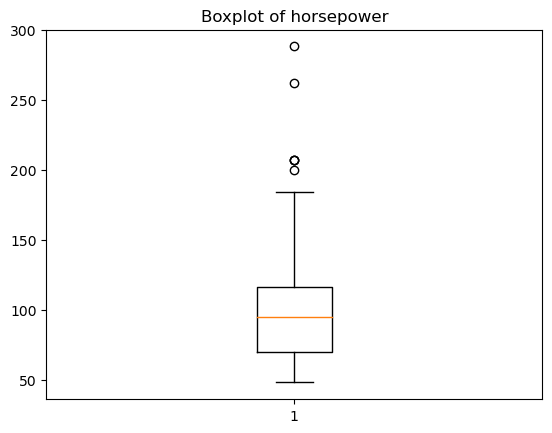

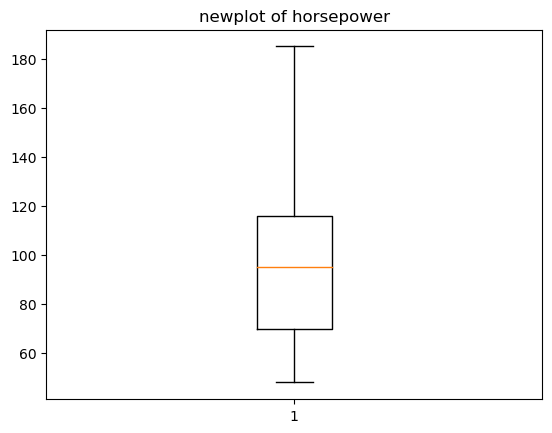

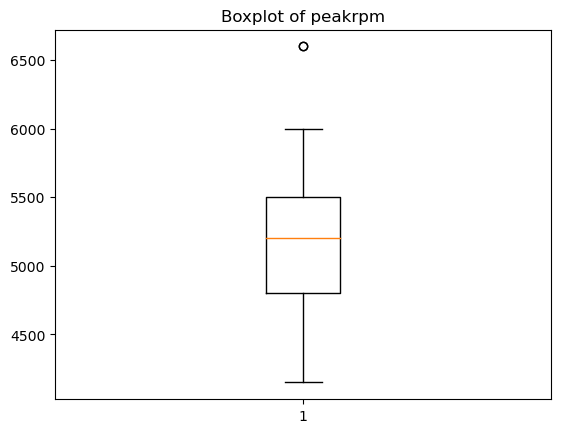

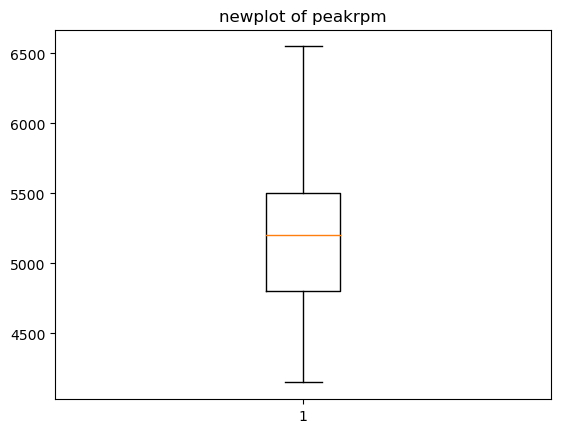

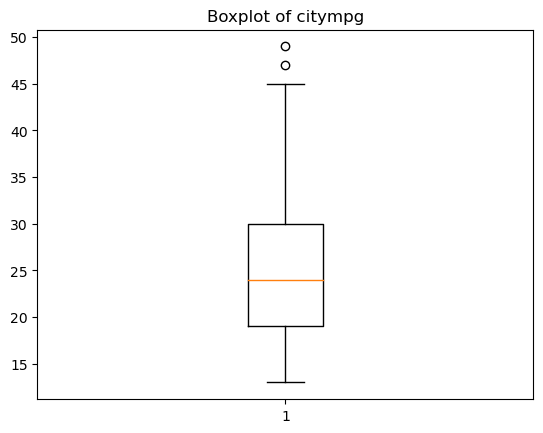

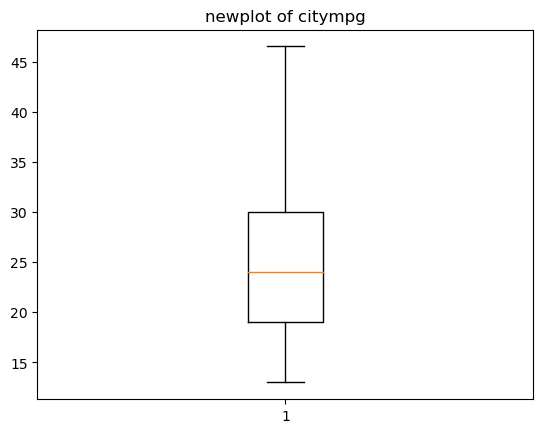

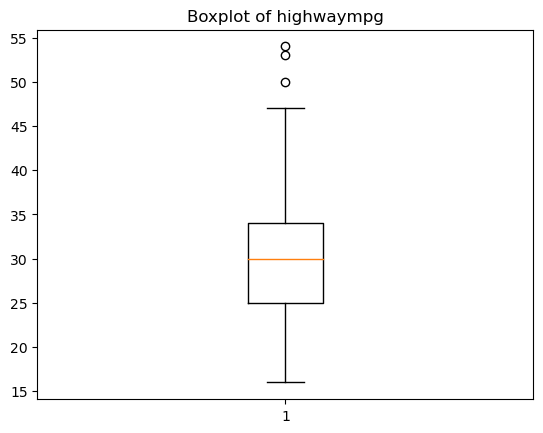

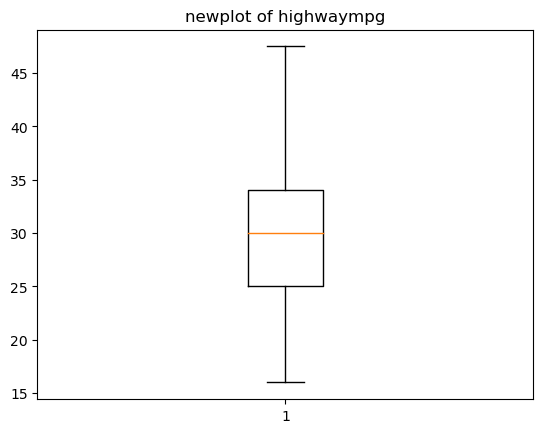

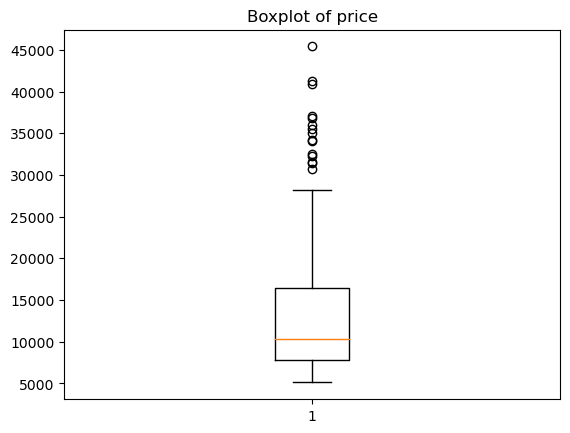

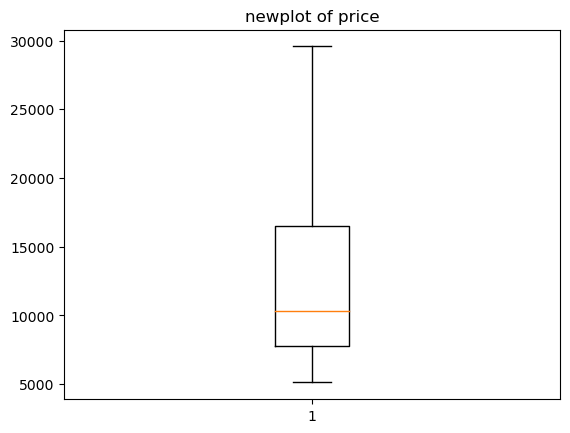

In [5]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.boxplot(data[column])
    plt.title("Boxplot of "+column)
    plt.show()
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_limit = data[column].quantile(0.25) - (1.5 * IQR)
    upper_limit = data[column].quantile(0.75) + (1.5 * IQR)
    data[column] = np.clip(data[column], lower_limit, upper_limit) 
    plt.boxplot(data[column])
    plt.title("newplot of "+column)
    plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate over each column
for col in data.columns:
    # Check if the column dtype is object (categorical)
    if data[col].dtype == 'object':
        # Use LabelEncoder for ordinal encoding
        data[col] = label_encoder.fit_transform(data[col])

In [8]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [9]:
X = data.drop(columns=['price'])  # Features
y = data['price']  # Target variable


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

In [25]:
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.1, 0.2, 0.5, 1.0],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='r2')

In [26]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [27]:
# Get the best model
best_model = grid_search.best_estimator_

In [28]:
# Making predictions on both training and testing datasets
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)


In [29]:
# Evaluating the model on training dataset
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Training Set:", mse_train)

# Evaluating the model on testing dataset
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on Testing Set:", mse_test)

Mean Squared Error on Training Set: 4903643.7413801905
Mean Squared Error on Testing Set: 7951085.233108797


In [30]:
# Evaluating the model on training dataset
train_score = best_model.score(X_train_scaled, y_train)
print("Score on Training Set:", train_score)

# Evaluating the model on testing dataset
test_score = best_model.score(X_test_scaled, y_test)
print("Score on Testing Set:", test_score)

Score on Training Set: 0.8856281091179914
Score on Testing Set: 0.8498712592728191


These scores suggest that the model generalizes well to unseen data, as the performance on the testing set is close to the performance on the training set.